In [69]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.drop(['ID'],axis =1, inplace = True)
test_data.drop(['ID'],axis =1, inplace = True)
out_data = train_data[train_data['class']== -999].index
new_train_data = train_data.drop(out_data)

In [71]:
X_train = new_train_data.drop(['class'], axis=1)
y_train = new_train_data['class']
X_train.shape



(4789, 8)

In [72]:
import numpy as np

def outliers_iqr(data):
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    
    return np.where((data> upper_bound)|(data < lower_bound))



In [77]:
ug_lead_outlier_index = outliers_iqr(X_train['u_g'])[0]
gr_lead_outlier_index = outliers_iqr(X_train['g_r'])[0]
iz_lead_outlier_index = outliers_iqr(X_train['i_z'])[0]
ri_lead_outlier_index = outliers_iqr(X_train['r_i'])[0]
o3index_lead_outlier_index = outliers_iqr(X_train['O3_index'])[0]
o2index_lead_outlier_index = outliers_iqr(X_train['O2_index'])[0]
sigmastar_lead_outlier_index = outliers_iqr(X_train['sigma_star'])[0]
sigma03_lead_outlier_index = outliers_iqr(X_train['sigma_o3'])[0]

In [81]:
X_train.loc[ug_lead_outlier_index,'u_g']
X_train.loc[gr_lead_outlier_index,'g_r']
X_train.loc[iz_lead_outlier_index,'i_z']
X_train.loc[ri_lead_outlier_index,'r_i']
X_train.loc[o3index_lead_outlier_index,'O3_index']
X_train.loc[o2index_lead_outlier_index,'O2_index']
X_train.loc[sigmastar_lead_outlier_index,'sigma_star']
X_train.loc[sigma03_lead_outlier_index,'sgima_o3']

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([1146], dtype='int64'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [82]:
lead_outlier_index = np.concatenate((sigma03_lead_outlier_index,sigmastar_lead_outlier_index,o3index_lead_outlier_index,o2index_lead_outlier_index
                                    ,ug_lead_outlier_index,gr_lead_outlier_index,iz_lead_outlier_index,ri_lead_outlier_index), axis = None)

print(len(lead_outlier_index))
lead_outlier_index

1917


array([2490, 3342, 3596, ..., 4766, 4779, 4786], dtype=int64)

In [83]:
lead_not_outlier_index = []

for i in X_train.index:
    if i not in lead_outlier_index:
        lead_not_outlier_index.append(i)

In [90]:
X_train_clean = X_train.loc[lead_not_outlier_index]


In [91]:
X_train_clean =X_train_clean.reset_index(drop = True)

In [92]:
X_train_clean

,O3_index,O2_index,sigma_star,sigma_o3,u_g,g_r,r_i,i_z
0,0.451072,0.937382,2.268922,2.418982,2.170366,1.061678,0.319187,0.442557
1,0.510605,0.151374,1.612544,1.865838,0.508636,0.128126,-0.085479,0.186809
2,0.604691,0.280999,2.186746,1.878498,2.077146,0.342641,0.058967,0.113909
3,0.387024,0.524951,2.368570,2.311265,1.956727,1.193386,0.269931,0.502498
4,0.259051,0.465401,1.757702,1.879787,0.943472,0.285368,0.234909,0.082096
...,...,...,...,...,...,...,...,...
3450,0.126068,0.470348,2.105984,1.954821,3.457254,0.437733,0.315954,-0.038082
3451,0.286460,0.595089,2.268873,2.189953,0.979456,1.156014,0.436563,0.236892
3452,-0.485462,0.127759,1.976665,1.881013,1.405806,0.409949,-0.717391,0.843585
3453,-0.383982,0.273225,2.074568,2.072062,1.793438,0.943150,0.408677,0.368323


C:\Users\N\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    2841
2    1083
3     450
4     415
Name: class, dtype: int64

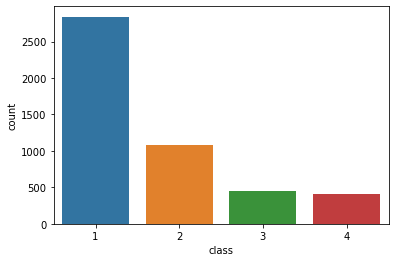

In [93]:
g = sns.countplot(y_train)
y_train.value_counts()

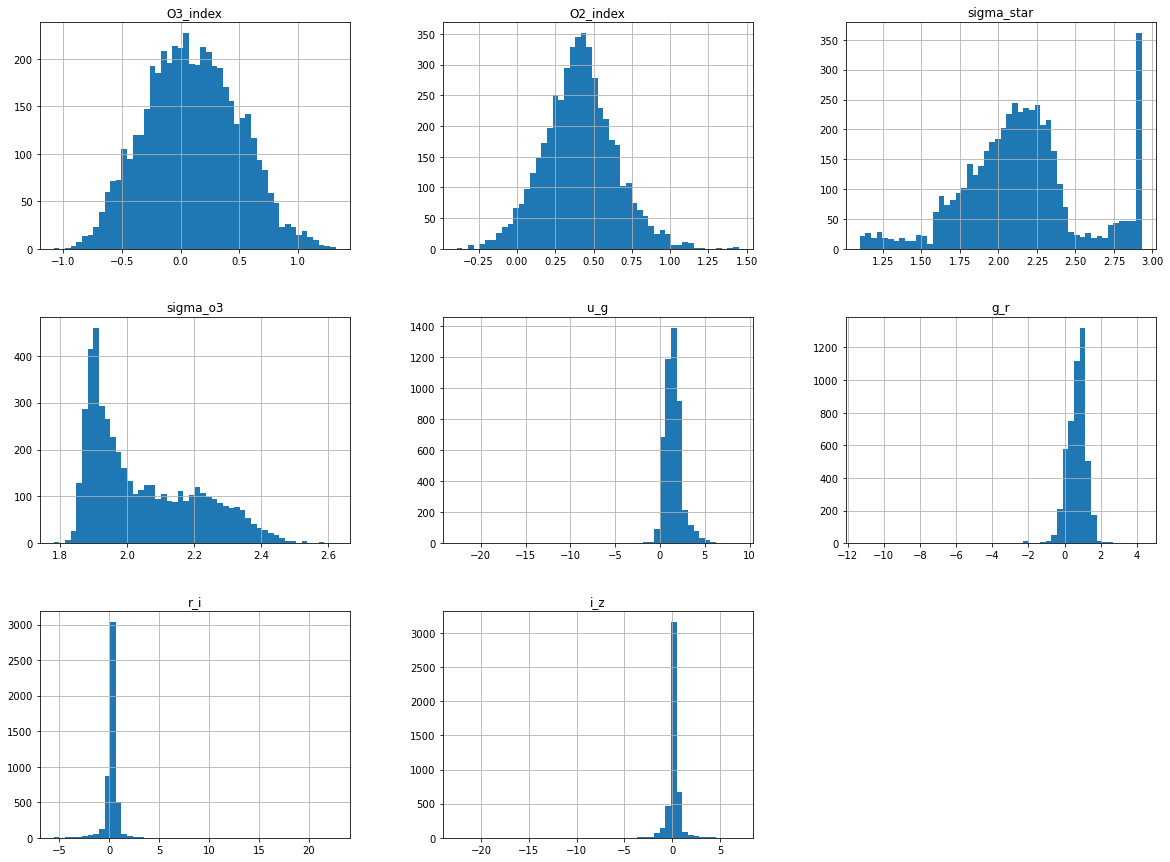

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
X_train.hist(bins=50, figsize=(20,15))
plt.show()

In [278]:

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(y_train)
y_train = LE.transform(y_train)

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)

In [279]:
y_train

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [284]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'categorical_crossentropy',metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)

parameters = {'batch_size': [25,32],
             'epochs': [50,100],
             'optimizer':['adam','rmsprop']}

grid_search = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10)

grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuacy = grid_search.best_scors_

<ipython-input-284-2853f533e481>:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  classifier = KerasClassifier(build_fn = build_classifier)
C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.

Epoch 1/50
Epoch 1/50
Epoch 1/50

C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra


Epoch 1/50
Epoch 1/50

C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra


Epoch 1/50
Epoch 1/50

C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra


Epoch 1/50
Epoch 1/50


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

Epoch 1/50
Epoch 1/50
Epoch 1/50


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

Epoch 1/50
Epoch 1/50
Epoch 1/50

C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra


Epoch 1/50
Epoch 1/50


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

Epoch 1/50
Epoch 1/50
Epoch 1/50


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

Epoch 1/100
Epoch 1/100
Epoch 1/100


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

Epoch 1/100
Epoch 1/100
Epoch 1/100


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

Epoch 1/100
Epoch 1/100
Epoch 1/100


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

Epoch 1/100
Epoch 1/100
Epoch 1/100


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

Epoch 1/100
Epoch 1/100
Epoch 1/100


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

Epoch 1/100
Epoch 1/100
Epoch 1/100


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

Epoch 1/100
Epoch 1/100
Epoch 1/50


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

Epoch 1/50
Epoch 1/50
Epoch 1/50


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

Epoch 1/50
Epoch 1/50
Epoch 1/50


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

Epoch 1/50
Epoch 1/50
Epoch 1/50


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

Epoch 1/50
Epoch 1/50
Epoch 1/50


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

Epoch 1/50
Epoch 1/50
Epoch 1/50


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

Epoch 1/50
Epoch 1/50
Epoch 1/50


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

Epoch 1/50
Epoch 1/100
Epoch 1/100


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

Epoch 1/100
Epoch 1/100
Epoch 1/100

C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra


Epoch 1/100


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

Epoch 1/100
Epoch 1/100
Epoch 1/100

C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra


Epoch 1/100
Epoch 1/100


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

Epoch 1/100
Epoch 1/100
Epoch 1/100


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

Epoch 1/100
Epoch 1/100
Epoch 1/100


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/50


C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\N\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\N\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py", line 1129, in autograph_handler
    ra

ValueError: in user code:

    File "C:\Users\N\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\N\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\N\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\N\anaconda3\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\N\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\N\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_177" is incompatible with the layer: expected shape=(None, 11), found shape=(None, 8)


In [267]:
input_node = 8
hidden_node = [35, 35]
output_node = 4

model = Sequential()
model.add(Dense(hidden_node[0], input_dim = input_node, kernel_initializer = 'normal', activation = 'relu', name = 'Hidden1'))
model.add(Dense(hidden_node[1], activation = 'relu', name = 'Hidden2'))

model.add(Dense(output_node, activation = 'softmax'))

In [268]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [269]:
model.fit(X_train, y_train, epochs =70, batch_size = 10, validation_split = 0.3)

Epoch 1/70
336/336 [==============================] - 1s 2ms/step - loss: 0.9312 - accuracy: 0.6086 - val_loss: 0.6951 - val_accuracy: 0.7203
Epoch 2/70
336/336 [==============================] - 0s 1ms/step - loss: 0.6187 - accuracy: 0.7419 - val_loss: 0.5988 - val_accuracy: 0.7634
Epoch 3/70
336/336 [==============================] - 1s 2ms/step - loss: 0.5677 - accuracy: 0.7670 - val_loss: 0.5913 - val_accuracy: 0.7474
Epoch 4/70
336/336 [==============================] - 1s 2ms/step - loss: 0.5428 - accuracy: 0.7843 - val_loss: 0.5657 - val_accuracy: 0.7634
Epoch 5/70
336/336 [==============================] - 1s 2ms/step - loss: 0.5272 - accuracy: 0.7885 - val_loss: 0.5501 - val_accuracy: 0.7864
Epoch 6/70
336/336 [==============================] - 1s 2ms/step - loss: 0.5097 - accuracy: 0.8019 - val_loss: 0.5436 - val_accuracy: 0.7738
Epoch 7/70
336/336 [==============================] - 0s 1ms/step - loss: 0.4993 - accuracy: 0.8043 - val_loss: 0.5129 - val_accuracy: 0.7989
Epoch 

In [270]:
y_pred = model.predict(test_data)
print(y_pred)
test_data.shape

[[9.1746187e-01 8.2262948e-02 2.7364137e-04 1.5064384e-06]
 [4.4588756e-04 1.1130585e-03 9.9547064e-01 2.9704655e-03]
 [7.0493817e-01 2.9476088e-01 2.7161032e-06 2.9822154e-04]
 ...
 [9.1459297e-05 1.6230181e-03 9.5811695e-01 4.0168568e-02]
 [9.9497753e-01 5.0224867e-03 5.0319066e-08 8.3021119e-09]
 [9.7724074e-01 2.0554408e-02 2.2024652e-03 2.4429792e-06]]


(1199, 8)

In [271]:
predict_list =y_pred.argmax(axis=1)
for i in range(len(predict_list)):
    predict_list[i] += 1
print(predict_list)

[1 3 1 ... 3 1 1]


In [272]:
ID_list = pd.read_csv("test.csv")['ID']
x = [predict_list]
def submission_csv(predict_list):
    for i in range(len(x)):
        submission = pd.DataFrame({
            "ID":ID_list,
            "class":x[i]
        })   
        submission.to_csv('submission_'+'Robust'+'.csv', index= False)
        
submission_csv(x)